In [8]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# globally available variables and their meanings
#           df - all raw CSV data
# df_train - raw training data (80% of df)
#  df_test - raw testing data (20% of df)

In [2]:
import zipfile
import io

# Get the data.
# Convert the data to a format you can easily manipulate (without changing the data itself).
# Ensure sensitive information is deleted or protected (e.g., anonymized).
# Data available at https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
def load_data() -> pd.DataFrame:
    with zipfile.ZipFile('./red-wine-quality-cortez-et-al-2009.zip', 'r') as zip_ref:
        csv = zip_ref.read('winequality-red.csv')
        return pd.read_csv(io.BytesIO(csv))

df = load_data()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


| feature | significance |
|:--|:--|
| fixed acidity | most acids involved with wine or fixed or nonvolatile (do not evaporate readily) |
| volatile acidity | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste |
| citric acid | found in small quantities, citric acid can add 'freshness' and flavor to wines |
| residual sugar | the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet |
| chlorides | the amount of salt in the wine |
| free sulfur dioxide | the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine |
| total sulfur dioxide | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine |
| density | the density of water is close to that of water depending on the percent alcohol and sugar content |
| pH | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale |
| sulfates | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant |
| alcohol | the percent alcohol content of the wine |
| quality | output variable (based on sensory data, score between 0 and 10) |

In [3]:
# Check the size and type of data (time series, sample, geographical, etc.).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


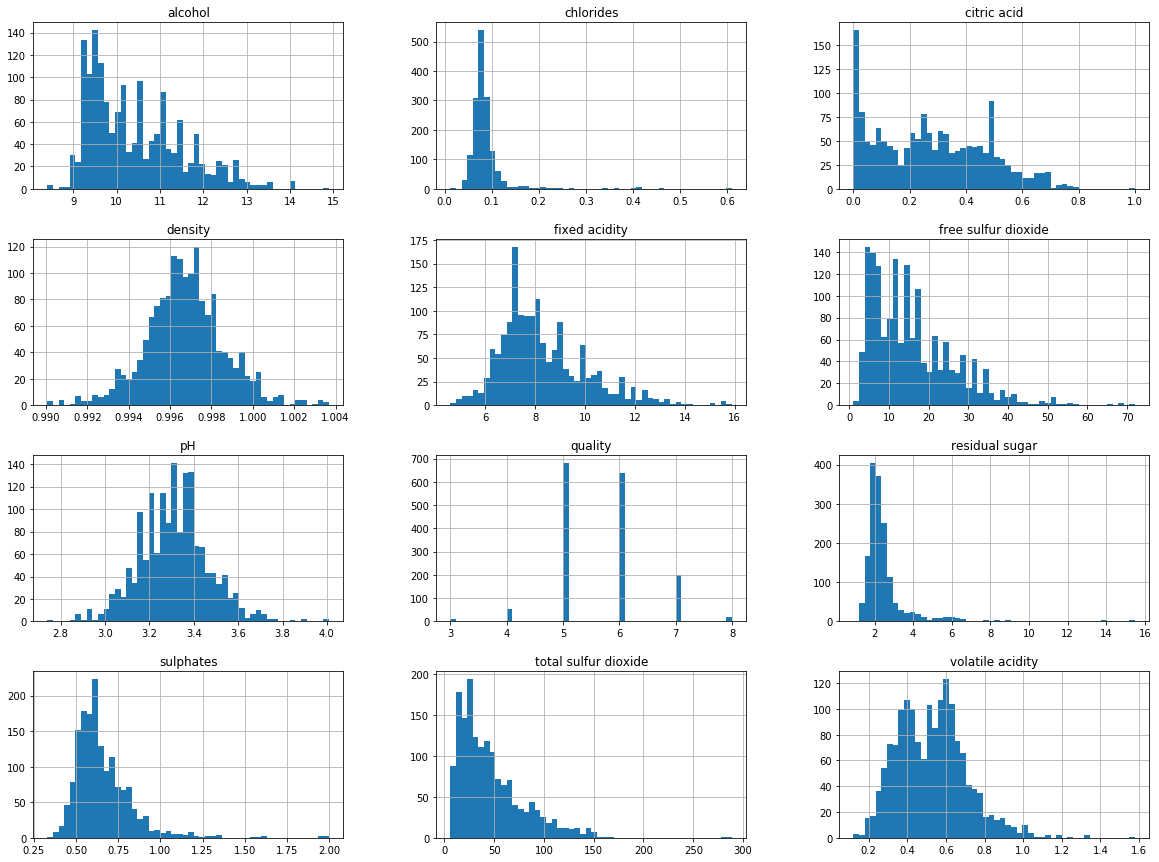

In [5]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [13]:
# Sample a test set, put it aside
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in sss.split(df, df['quality']):
    df_train, df_test = df.iloc[train_index], df.iloc[test_index]

# Check stratification
df_vc = df.quality.value_counts() / len(df)
df_train_vc = df_train.quality.value_counts() / len(df_train)
diff = np.abs(df_vc - df_train_vc)
pd.concat([df_vc, df_train_vc, diff], axis=1, keys=['all', 'training', 'abs diff'])

,all,training,abs diff
5,0.425891,0.426114,2.229697e-04
6,0.398999,0.398749,2.503519e-04
7,0.124453,0.124316,1.369112e-04
4,0.033146,0.032838,3.075613e-04
8,0.011257,0.011728,4.708768e-04
3,0.006254,0.006255,9.779372e-07


In [71]:
# % of missing values
for column in df.columns:
    num_na_rows = len(df[pd.isna(df[column])])
    pc_missing = num_na_rows / len(df)
    print('%s %2d%%' %(column, pc_missing))

fixed acidity  0%
volatile acidity  0%
citric acid  0%
residual sugar  0%
chlorides  0%
free sulfur dioxide  0%
total sulfur dioxide  0%
density  0%
pH  0%
sulphates  0%
alcohol  0%
quality  0%


In [72]:
# another way of checking missing values
sample_incomplete_rows = df[df.isnull().any(axis=1)]
print('Number of incomplete rows: %s' % len(sample_incomplete_rows))

Number of incomplete rows: 0


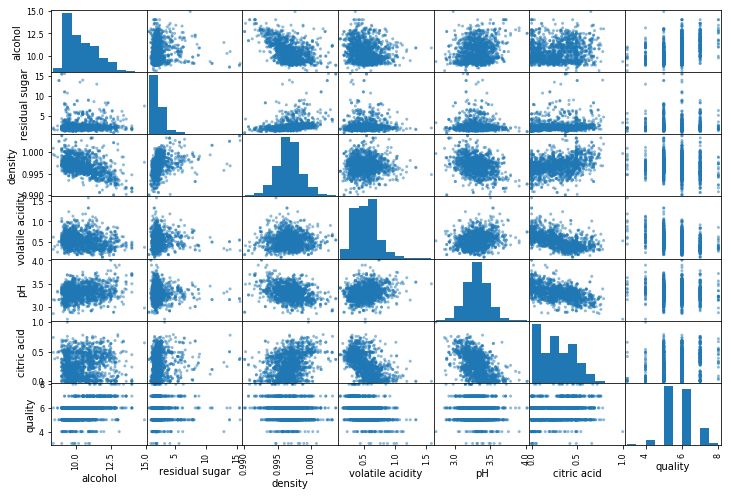

In [63]:
attrs = ['alcohol', 'residual sugar', 'density', 'volatile acidity', 'pH', 'citric acid', 'quality']
pd.plotting.scatter_matrix(df[attrs], figsize=(12, 8))
plt.show()

In [64]:
# Study the correlations between attributes.
# It appears alcohol positively correlates with quality, while volatile acidity negatively correlates with quality
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64